# Individual Project

In this project I used libraries like **pandas, numoy, matplot** etc in order to analyze and explore NYC taxi trips in a span of 2 weeks.

First of all, in the first cell we look for the properties of the dataset we have.(Types, size etc.)

**Description**

The project consists of two parts; data exploration and hypothesis testing. In data exploration, you
will extract and present insights about the data. And in the second part, you will evaluate two hypothesis
regarding trip distances.


# Data Exploration

In [2]:
import numpy as np # np as an alias for numpy
import pandas as pd  # an alias for pandas
import matplotlib.pyplot as plt
import reverse_geocoder as rg
from os.path import join
import csv
import seaborn as sns
from scipy import stats

filename= "taxi-trips.csv"
data_path=""

df = pd.read_csv(join(data_path, filename), delimiter=",",quoting=csv.QUOTE_NONNUMERIC)

df_c = df.copy()
#df_c["pickup_district"] = "a"

print(df_c.shape)
print(df_c.dtypes)
df_c.describe()




(118185, 11)
id                     object
vendor_id             float64
pickup_datetime        object
dropoff_datetime       object
passenger_count       float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration         float64
dtype: object


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000




In the cell below, I took out the pickup and dropoff coordinates from dataframe as lists, and put the lists in a **rg.search** function to have the district values of every coordination and append them as new columns to dataframe named **pickup_district** and **dropoff_district.**



In [3]:
pickupCoord = [(str(row[6]),str(row[5])) for row in csv.reader(open(filename,'rt'),delimiter=',')]


del pickupCoord[0]

pickUpDict = rg.search(pickupCoord)
listN=[]
for x in range(0,len(pickUpDict)):
    listN.append(pickUpDict[x].get('name'))
    

df_c["pickup_district"]=listN
df_c.head()

##############################

dropOffCoord = [(str(row[8]),str(row[7])) for row in csv.reader(open(filename,'rt'),delimiter=',')]

del dropOffCoord[0]

dropOffDict = rg.search(dropOffCoord)
droplist=[]
for k in range(0,len(dropOffDict)):
    droplist.append(dropOffDict[k].get('name'))
    
df_c["dropoff_district"] = droplist

#df_c = df_c[df_c.pickup_district != 'chad']

df_c.head()


Loading formatted geocoded file...


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district
0,id2875421,2.0,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,N,455.0,Manhattan,Manhattan
1,id0012891,2.0,2016-03-10 21:45:01,2016-03-10 22:05:26,1.0,-73.981049,40.744339,-73.973000,40.789989,N,1225.0,Long Island City,Manhattan
2,id3361153,1.0,2016-03-11 07:11:23,2016-03-11 07:20:09,1.0,-73.994560,40.750526,-73.978500,40.756191,N,526.0,Weehawken,Manhattan
3,id2129090,1.0,2016-03-14 14:05:39,2016-03-14 14:28:05,1.0,-73.975090,40.758766,-73.953201,40.765068,N,1346.0,Manhattan,Long Island City
4,id0256505,1.0,2016-03-14 15:04:38,2016-03-14 15:16:13,1.0,-73.994484,40.745087,-73.998993,40.722710,N,695.0,New York City,New York City





**Top 5 Pickup Districts**

In [4]:
df_c["pickup_district"].value_counts()[0:5]

Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: pickup_district, dtype: int64



**Top 5 Dropoff Districts**

In [5]:
df_c["dropoff_district"].value_counts()[0:5]

Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Name: dropoff_district, dtype: int64



**I put all coordinate lists in geodesic function to find the distances between pickup and dropoff coordinates, and append the distance(in miles) to the dataframe.**

In [6]:
from geopy.distance import geodesic

d=[]
for m in range(0,len(pickupCoord)):
    d.append(geodesic(pickupCoord[m], dropOffCoord[m]).miles)

df_c["distance"] = d
df_c.head()



,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance
0,id2875421,2.0,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,N,455.0,Manhattan,Manhattan,0.933406
1,id0012891,2.0,2016-03-10 21:45:01,2016-03-10 22:05:26,1.0,-73.981049,40.744339,-73.973000,40.789989,N,1225.0,Long Island City,Manhattan,3.178194
2,id3361153,1.0,2016-03-11 07:11:23,2016-03-11 07:20:09,1.0,-73.994560,40.750526,-73.978500,40.756191,N,526.0,Weehawken,Manhattan,0.928961
3,id2129090,1.0,2016-03-14 14:05:39,2016-03-14 14:28:05,1.0,-73.975090,40.758766,-73.953201,40.765068,N,1346.0,Manhattan,Long Island City,1.228003
4,id0256505,1.0,2016-03-14 15:04:38,2016-03-14 15:16:13,1.0,-73.994484,40.745087,-73.998993,40.722710,N,695.0,New York City,New York City,1.562103





**In the cell below, I used pickup_datetime and dropoff_datetime columns and put them into new columns, and using .hour function I reached hour value of datetime objects. After that, I added some conditions to change the hour values with labels determined in the project documentation. In the end, I created new column with label values with respect to each row's datetime object.**


In [7]:
from datetime import datetime
from dateutil import parser


pickupT = [(row[3]) for row in csv.reader(open(filename,'rt'),delimiter=',')]

#print(len(pickupT))

del pickupT[0]

df_c["pickup_datetime"] = pickupT

df_c["pickup_datetime"] = df_c["pickup_datetime"].astype('datetime64[ns]')

hours=df_c["pickup_datetime"].dt.hour

df_c["hour"] = hours
df_c["hour"] = df_c["hour"].astype(str)




conditions = [
    (df_c['hour'] == '7') | (df_c['hour'] == '8'),
    (df_c['hour'] == '9') | (df_c['hour'] == '10') | (df_c['hour'] == '11') | (df_c['hour'] == '12') | (df_c['hour'] == '13') | (df_c['hour'] == '14') | (df_c['hour'] == '15'),
    (df_c['hour'] == '16') | (df_c['hour'] == '17'),
    (df_c['hour'] == '18') | (df_c['hour'] == '19') | (df_c['hour'] == '20') | (df_c['hour'] == '21') | (df_c['hour'] == '22'),
    (df_c['hour'] == '23') | (df_c['hour'] == '0') | (df_c['hour'] == '1') | (df_c['hour'] == '2') | (df_c['hour'] == '3') | (df_c['hour'] == '4') | (df_c['hour'] == '5') | (df_c['hour'] == '6')
            ]

choices = ["rush_hour_morning", "afternoon", "rush_hour_evening","evening","late_night"]

df_c["time_of_day"] = np.select(conditions, choices)

df_c.drop('hour', axis=1, inplace=True)

df_c.head()




,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,time_of_day
0,id2875421,2.0,2016-03-14 17:32:30,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,N,455.0,Manhattan,Manhattan,0.933406,rush_hour_evening
1,id0012891,2.0,2016-03-10 22:05:26,2016-03-10 22:05:26,1.0,-73.981049,40.744339,-73.973000,40.789989,N,1225.0,Long Island City,Manhattan,3.178194,evening
2,id3361153,1.0,2016-03-11 07:20:09,2016-03-11 07:20:09,1.0,-73.994560,40.750526,-73.978500,40.756191,N,526.0,Weehawken,Manhattan,0.928961,rush_hour_morning
3,id2129090,1.0,2016-03-14 14:28:05,2016-03-14 14:28:05,1.0,-73.975090,40.758766,-73.953201,40.765068,N,1346.0,Manhattan,Long Island City,1.228003,afternoon
4,id0256505,1.0,2016-03-14 15:16:13,2016-03-14 15:16:13,1.0,-73.994484,40.745087,-73.998993,40.722710,N,695.0,New York City,New York City,1.562103,afternoon












**This is a bar graph of average distance covered of the trips in different times of the day. We can observe that mean of distance covered in late night is highest.**

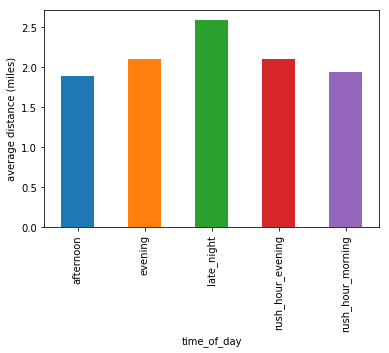

In [8]:
df_c.groupby('time_of_day')['distance'].mean().plot(kind='bar')

plt.ylabel('average distance (miles)')
plt.show()


**This is a bar graph of average duration of the trips in different times of the day. We can observe that duration of trips in the rush hour evening is the highest.**

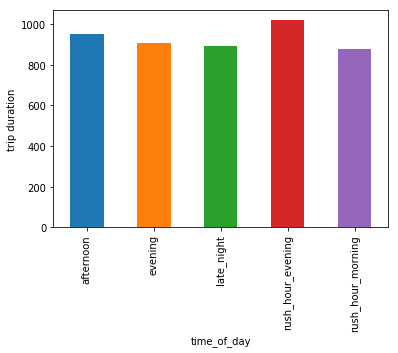

In [9]:
df_c.groupby('time_of_day')['trip_duration'].mean().plot(kind='bar')

plt.ylabel('trip duration')
plt.show() 

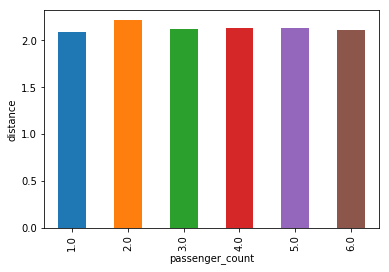

In [10]:
df_c2 = df_c.copy()

df_c2=df_c2[df_c2.passenger_count != 0]

df_c2.groupby('passenger_count')['distance'].mean().plot(kind='bar')
plt.ylabel('distance')
plt.show()


mean distance of 1+ passenger trip: 2.17
mean distance of 1 passenger trip: 2.09
mean distance of 2 passenger trip: 2.21
mean distance of 3 passenger trip: 2.12
mean distance of 4 passenger trip: 2.13
mean distance of 5 passenger trip: 2.13
mean distance of 6 passenger trip: 2.11


/Users/hakan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


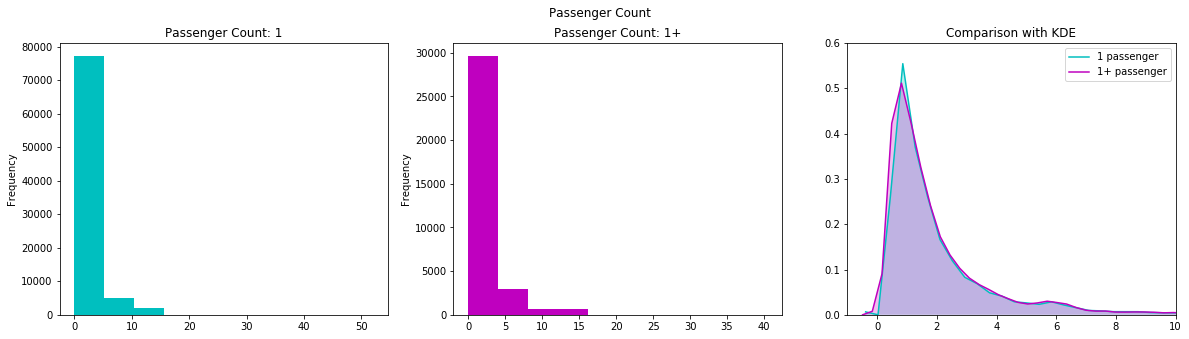

Ttest_indResult(statistic=-4.903362110492283, pvalue=9.445117080443264e-07)

In [11]:
test_type = "distance"

gplus1 = df_c[df_c["passenger_count"] > 1.0][test_type] 

g1 = df_c[df_c["passenger_count"] == 1.0][test_type]
g2 = df_c[df_c["passenger_count"] == 2.0][test_type] 
g3 = df_c[df_c["passenger_count"] == 3.0][test_type]
g4 = df_c[df_c["passenger_count"] == 4.0][test_type] 
g5 = df_c[df_c["passenger_count"] == 5.0][test_type]
g6 = df_c[df_c["passenger_count"] == 6.0][test_type] 

print("mean distance of 1+ passenger trip: {:.2f}".format(gplus1.mean()))
print("mean distance of 1 passenger trip: {:.2f}".format(g1.mean()))
print("mean distance of 2 passenger trip: {:.2f}".format(g2.mean()))
print("mean distance of 3 passenger trip: {:.2f}".format(g3.mean()))
print("mean distance of 4 passenger trip: {:.2f}".format(g4.mean()))
print("mean distance of 5 passenger trip: {:.2f}".format(g5.mean()))
print("mean distance of 6 passenger trip: {:.2f}".format(g6.mean()))


fig, ax = plt.subplots(1,3, figsize=(20,5))  

g1.plot(kind="hist", ax=ax[0], bins=10, label="completed", color="c")
ax[0].set_title("Passenger Count: 1")

gplus1.plot(kind="hist", ax=ax[1], bins=10, label="none", color="m")
ax[1].set_title("Passenger Count: 1+")

sns.kdeplot(g1, shade=True, label="1 passenger", ax=ax[2], color="c")
sns.kdeplot(gplus1, shade=True, label="1+ passenger", ax=ax[2], color="m")
#sns.kdeplot(g3, shade=False, label="3 passenger", ax=ax[2], color="y")
#sns.kdeplot(g4, shade=False, label="4 passenger", ax=ax[2], color="r")
#sns.kdeplot(g5, shade=False, label="5 passenger", ax=ax[2], color="g")
#sns.kdeplot(g6, shade=False, label="6 passenger", ax=ax[2], color="b")

ax[2].set_title("Comparison with KDE")

plt.suptitle("Passenger Count")

plt.ylim([0,0.6])
plt.xlim([-1,10])
plt.show()

stats.ttest_ind(g1, gplus1, equal_var=False)

# Hypothesis Testing
In the cell above, I printed the mean distances covered by passenger count. As we can observe 1+ passenger has more mean distance covered

We stated in our **NULL HYPOTHESIS** that **passenger group size has no effect on the distance**. However, as we can observe in out P-Test, **p value of the datasets is lower than 0.05.** Which means that there is a relation between passenger count and distance covered.

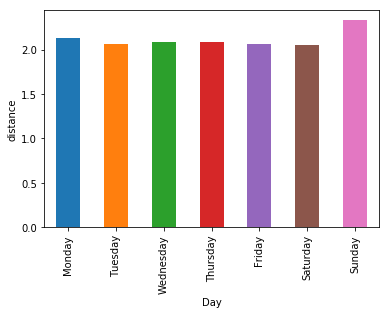

In [12]:
days = df_c["pickup_datetime"]

dayname =[]

for i in range (0,len(days)):
    dayname.append(days[i].weekday())

df_c["dayname"] = dayname

df_c.groupby('dayname')['distance'].mean().plot(kind='bar')

plt.xlabel('Day')
plt.ylabel('distance')
plt.xticks([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.show()


mean distance of weekday trip: 2.08
mean distance of weekend trip: 2.18


Ttest_indResult(statistic=-6.130309073279657, pvalue=8.820565255961394e-10)

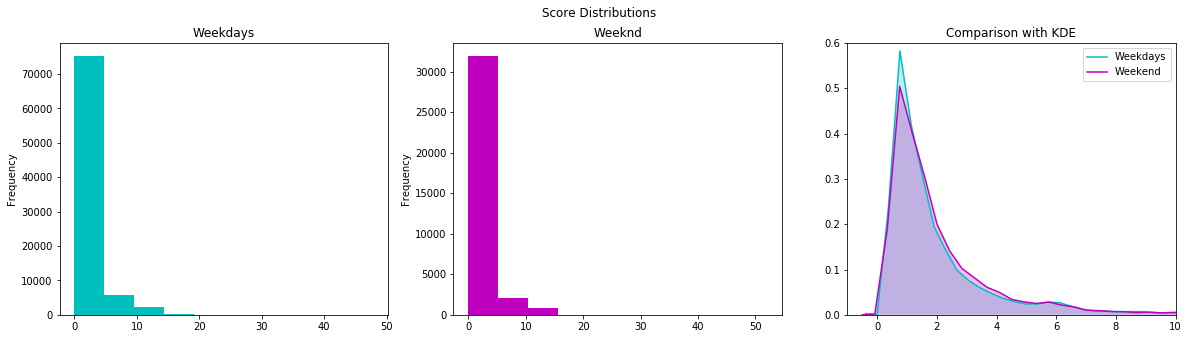

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))  # a figure with 1 row and 3 columns
test_type ="distance"                       # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart

gr1 = df_c[df_c["dayname"] < 5][test_type]
gr2 = df_c[df_c["dayname"] >= 5][test_type] 

gr1.plot(kind="hist", ax=ax[0], bins=10, label="Weekdays", color="c")
ax[0].set_title("Weekdays")

gr2.plot(kind="hist", ax=ax[1], bins=10, label="Weekend", color="m")
ax[1].set_title("Weeknd")

sns.kdeplot(gr1, shade=True, label="Weekdays", ax=ax[2], color="c")
sns.kdeplot(gr2, shade=True, label="Weekend", ax=ax[2], color="m")

plt.ylim([0,0.6])
plt.xlim([-1,10])

ax[2].set_title("Comparison with KDE")

plt.suptitle("Score Distributions")

print("mean distance of weekday trip: {:.2f}".format(gr1.mean()))
print("mean distance of weekend trip: {:.2f}".format(gr2.mean()))

stats.ttest_ind(gr1, gr2, equal_var=False)


As we can observe in the output above, statistic value has negative value, which means first value is lower than the second value in the T test. and also, our **Null hypothesis is, The day of the week has no effect on the distance.**
p value is smaller than 0.05 level. Therefore dataset we have doesnt support our Null hypothesis.